In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로딩
card_df = pd.read_csv('./creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [5]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [16]:
# 학습/테스트 데이터 레이블 분포 확인
print('학습 데이터 레이블 값 비율')
# print(y_train.value_counts())
# print(y_train.shape)
print(y_train.value_counts() / y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.count() * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
# 이진 분류 : 신용카드 사기 검출 => 0 : 정상, 1 : 사기
# LogisticRegression
from sklearn.linear_model import LogisticRegression

# 1. object 생성
lr_clf = LogisticRegression(max_iter=1000)

# 2. 학습
lr_clf.fit(X_train, y_train)

# 3. 모델 평가 : 불균형 => 혼동행렬, 정확도, 정밀도, 재현율, f1_score, AUC : get_clf_eval()
# get_clf_eval(원래답:y_test, 예측값:pred, 예측확률:pred_proba)
# 예측값
lr_pred = lr_clf.predict(X_test)

# 예측확률
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 평가
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9751


In [19]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [20]:
# lightGBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
      n_estimators=1000
    , num_leaves=64
    , n_jobs=-1
    , boost_from_average=False
    )
get_model_train_eval(
      lgbm_clf
    , ftr_train=X_train
    , ftr_test=X_test
    , tgt_train=y_train
    , tgt_test=y_test
    )

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


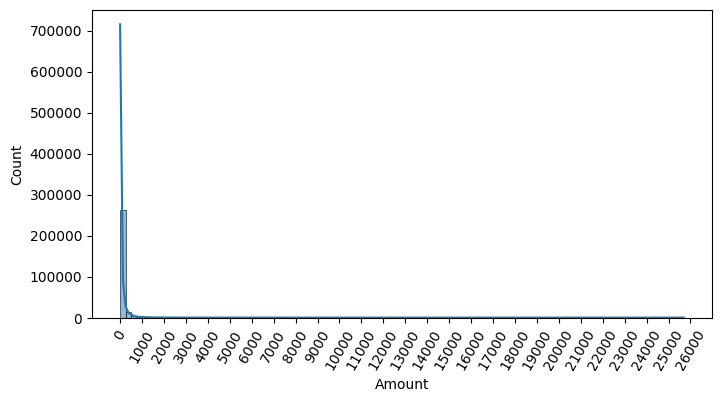

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [23]:
from scipy.stats import skew, kurtosis

# 왜도 : 데이터 비대칭성을 확인
# 비대칭일때 처리 : 로그변환
print(skew(card_df['Amount']))

# 첨도 => 
# 양의 첨도 : 꼬리가 두껍고 중앙 부분이 뾰족, 극단값이 자주 발생
# - 극단값 처리 필수, 적절한 모델 선택 필요
# 음의 첨도 : 꼬리가 얇고 중앙 부분이 평평, 극단값이 적게 발생
# 중간 첨도 : 정규분포
print(kurtosis(card_df['Amount']))

# 정규분포 : 왜도가 0에 가깝다, 첨도도 0에 가까운 경우를 이야기한다

16.97763503663315
845.0777883188754


In [36]:
from sklearn.preprocessing import StandardScaler

# 기존 데이터 평균, 표준편차, 왜도(skew), 첨도(kurtosis)
avg_amount = card_df['Amount'].mean()
print(avg_amount)
std_amount = card_df['Amount'].std()
print(std_amount)
print(skew(card_df['Amount']))
print(kurtosis(card_df['Amount']))

scaler = StandardScaler()
n_amount = scaler.fit_transform(card_df['Amount'].values.reshape(-1, 1))
print(f'정규화 후 평균 : {n_amount.mean()}')
print(f'정규화 후 표준편차 : {n_amount.std()}')
print(f'정규화 후 왜도 : {skew(n_amount)}')
print(f'정규화 후 첨도 : {kurtosis(n_amount)}')

88.34961925093133
250.1201092401885
16.97763503663315
845.0777883188754
정규화 후 평균 : 2.913951958230651e-17
정규화 후 표준편차 : 1.0
정규화 후 왜도 : [16.97763504]
정규화 후 첨도 : [845.07778832]
